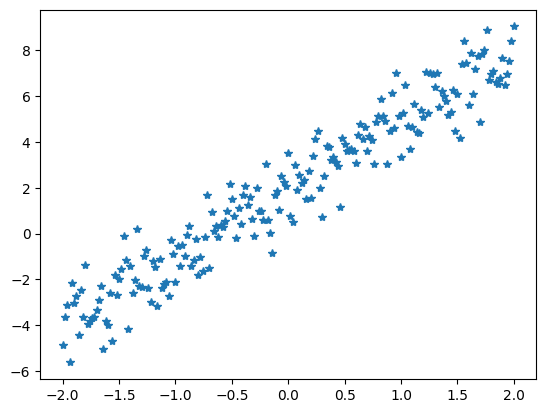

In [66]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [7]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest` LIMIT 100
    """
)

result = query_job.result()

tensor = []

for row in result:
    tensor.append(json.loads(row.positions_member))

# print(tensor)

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
candidate = df.pop('database')

df.head()


,codeLanguage,softwares,jobTitle,skills
0,React,,0,"[,]"
1,React,,UX / UI Designer,"[,]"
2,React,,Developer front-end,"[,]"
3,React,,0,"[,]"
4,React,,Developer back-end,"[,]"


In [8]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 100
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,17.000000000,14.000000000,20.000000000,19.000000000,89.000000000,19.000000000,None,BRL,150,...,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,16.000000000,13.000000000,18.000000000,14.000000000,76.000000000,15.000000000,None,BRL,14.4,...,100.000000000,80.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,100.000000000


In [9]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,17.000000000,14.000000000,20.000000000,19.000000000,89.000000000,19.000000000,None,150,25.000000000,...,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,16.000000000,13.000000000,18.000000000,14.000000000,76.000000000,15.000000000,None,14.4,1.000000000,...,100.000000000,80.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,100.000000000


In [10]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,,Expert,Hora
1,ND,ND,ND,ND
2,ND,ND,ND,ND
3,ND,quality assurance engineer,júnior,hora
4,BRL,,Júnior,Full-time


In [11]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_BRL,wages_currency_ND,experience_jobTitle_,experience_jobTitle_ND,experience_jobTitle_agile coach,experience_jobTitle_data engineer,experience_jobTitle_data scientist,experience_jobTitle_developer back-end,experience_jobTitle_developer front-end,experience_jobTitle_developer full-stack,...,experience_level_júnior,experience_level_pleno,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce', downcast="integer")
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_júnior,experience_level_pleno,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,17,14,20,19,89,19,0,150.0,25,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0.0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,16,13,18,14,76,15,0,14.4,1,...,0,0,0,1,0,0,0,0,0,0


In [22]:
categ = pd.get_dummies(df, dtype=int)
categ.head()

codeLanguage_React
softwares_
jobTitle_0
jobTitle_Agile coach
jobTitle_DevOps engineer
jobTitle_Developer back-end
jobTitle_Developer front-end
jobTitle_Developer full-stack
jobTitle_Product owner
jobTitle_Software engineer
jobTitle_UX / UI Designer
skills_[,]


In [49]:
import numpy as np

new_dt = []
cols = []
print(ks.values)
for i in range(100):
    new_dt.append(ks.values)
    cols.append(str(i))

pd_ndt = np.array(new_dt)
print(pd_ndt.shape)


[[ 0. 17. 14. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(100, 100, 74)


ValueError: Unable to coerce to Series/DataFrame, dimension must be <= 2: (100, 100, 74)

In [46]:
indexes = []
for i in range(100):
    indexes.append(i)

idex = np.array(indexes)
np.random.shuffle(idex)

print(idex)


[50 94 10 47 61 46 34  6 16 56 54  0 76 33 18 86 75 11  5 98 83  8 80 89
 82 52 48  9 42  4 84 74 65 59 55 97 95 81 17 44 45 24 12  1 92 91 72 62
 39 49 99  2 79 68 71 87 32 28 26 66 90 69 15 20 30 37 70 60 73 21 38  7
  3 31 36 35 93 51 27 58 25 57 22 78 41 13 77 14 29 19 43 23 67 63 88 85
 53 64 96 40]


In [61]:
import tensorflow as tf

# ts = ks.values.flatten()

candidateDb = tf.data.Dataset.from_tensor_slices(pd_ndt, name="vaga")
vagas = tf.data.Dataset.from_tensor_slices(categ, name="vaga")
indexDb = tf.data.Dataset.from_tensor_slices([idex], name="vaga")

print(candidateDb, vagas, indexDb)

for vaga in vagas.take(20):
    print('Vaga: {}'.format(vaga.dtype))


<_TensorSliceDataset element_spec=TensorSpec(shape=(100, 74), dtype=tf.float64, name=None)> <_TensorSliceDataset element_spec=TensorSpec(shape=(12,), dtype=tf.int32, name=None)> <_TensorSliceDataset element_spec=TensorSpec(shape=(100,), dtype=tf.int32, name=None)>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>
Vaga: <dtype: 'int32'>


[(None, 12), (None, 100, 74)] (None, 1)
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 100, 74)]            0         []                            
                                                                                                  
 dense_49 (Dense)            (None, 100, 80)              6000      ['input_8[0][0]']             
                                                                                                  
 dense_50 (Dense)            (None, 100, 15)              1215      ['dense_49[0][0]']            
                                                                                                  
 dense_51 (Dense)            (None, 100, 8)               128       ['dense_50[0][0]']            
                                                   

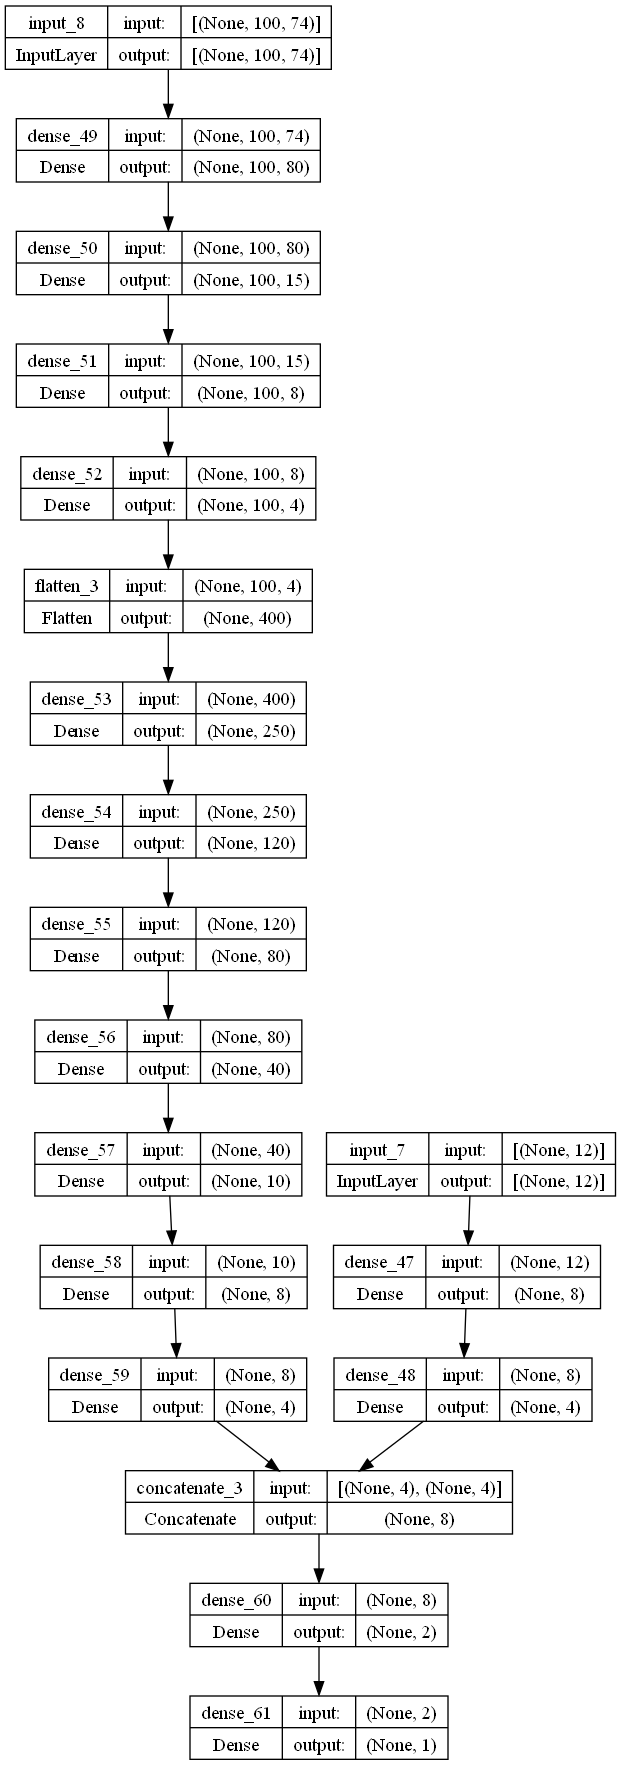

In [62]:
from tensorflow import keras

slot_input = keras.Input(shape=(12,))
pro_input = keras.Input(shape=(100,74))

x = keras.layers.Dense(8, activation="relu") (slot_input)
x = keras.layers.Dense(4, activation="relu") (x)
x = keras.Model(inputs=slot_input, outputs=x)

y = keras.layers.Dense(60, activation="relu") (pro_input)
y = keras.layers.Dense(15, activation="relu") (y)
y = keras.layers.Dense(8, activation="relu") (y)
y = keras.layers.Dense(4, activation="relu") (y)
y = keras.layers.Flatten() (y)
y = keras.layers.Dense(250, activation="relu") (y)
y = keras.layers.Dense(120, activation="relu") (y)
y = keras.layers.Dense(80, activation="relu") (y)
y = keras.layers.Dense(40, activation="relu") (y)
y = keras.layers.Dense(10, activation="relu") (y)
y = keras.layers.Dense(8, activation="relu") (y)
y = keras.layers.Dense(4, activation="relu") (y)
y = keras.Model(inputs=pro_input, outputs=y)

combine = keras.layers.concatenate([x.output, y.output])

z = keras.layers.Dense(2, activation="relu") (combine)
z = keras.layers.Dense(1, activation="softmax") (z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

print(model.input_shape, model.output_shape)

model.compile(
      optimizer=keras.optimizers.Adam(1e-2),
      loss=[keras.losses.MeanAbsolutePercentageError()],
      metrics=[keras.metrics.MeanAbsolutePercentageError()]
)

model.summary()

keras.utils.plot_model(model, "first_model.png", True)

In [69]:
# dtst = keras.utils.to_categorical(dataset.choose_from_datasets(dataset, [0]), dtype="float32")
history = model.fit([categ, pd_ndt], [idex], epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 9ms/step - loss: 10000093.0000 - mean_absolute_percentage_error: 10000093.0000
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000
Epoch 3/30
4/4 [==============================] - 0s 8ms/step - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000
Epoch 5/30
4/4 [==============================] - 0s 10ms/step - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000
Epoch 8/30
4/4 [==============================] - 0s 10ms/step - loss: 10

{'loss': [10000093.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0], 'mean_absolute_percentage_error': [10000093.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000094.0, 10000093.0, 10000094.0, 10000093.0, 10000094.0, 10000094.0, 10000093.0]}
4/4 - 0s - loss: 10000094.0000 - mean_absolute_percentage_error: 10000094.0000 - 38ms/epoch - 9ms/step


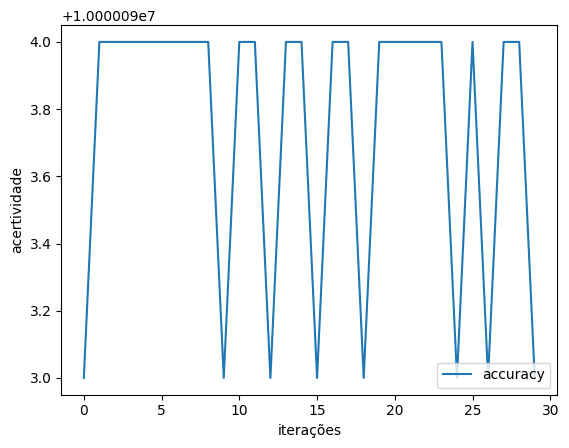

In [70]:
print(history.history)
plt.plot(history.history['loss'], label='accuracy')
# plt.plot(history.history['logcosh'], label= 'logcosh')
plt.xlabel('iterações')
plt.ylabel('acertividade')
# plt.ylim([0.1,0.7])
plt.legend(loc='lower right')

test_loss, test_acc, *outros = model.evaluate([categ, pd_ndt], [idex], verbose=2)

In [81]:
global vaguinha
for vag in categ:
    vaguinha = vag

print(vaguinha)
prediction = model.predict([categ, pd_ndt])

skills_[,]
4/4 [==============================] - 0s 3ms/step
